# data/mc plots

### Post-process Data and MC samples

- Sum all MC samples that belong to the same process
- Scale the number of events by the total sum of weights

In [1]:
# import utilities for post-process
import utils
import plotting

In [2]:
samples = {
    "qcd": [
        "QCD_PT-120to170",
        "QCD_PT-170to300",
        "QCD_PT-470to600",
        "QCD_PT-600to800",
        "QCD_PT-800to1000",
        "QCD_PT-1000to1400",
        "QCD_PT-1400to1800",
        "QCD_PT-1800to2400",
        "QCD_PT-2400to3200",
        "QCD_PT-3200",
    ],
    "qcd-ht": [
        "QCDB_HT-40to100",
        "QCDB_HT-100to200",
        "QCDB_HT-200to400",
        "QCDB_HT-400to600",
        "QCDB_HT-600to800",
        "QCDB_HT-800to1000",
        "QCDB_HT-1000to1500",
        "QCDB_HT-1500to2000" "QCDB_HT-2000",
    ],
    "data": [
        "Run2022F",
        "Run2022G",
    ],
    "ttbar": [
        "TTtoLNu2Q",
        "TTto4Q",
        "TTto2L2Nu",
    ],
    "gghtobb": [
        "GluGluHto2B_PT-200_M-125",
    ],
    "vbfhtobb": [
        "VBFHto2B_M-125_dipoleRecoilOn",
    ],
    "vhtobb": [
        "WplusH_Hto2B_Wto2Q_M-125",
        "WplusH_Hto2B_WtoLNu_M-125",
        "WminusH_Hto2B_Wto2Q_M-125",
        "WminusH_Hto2B_WtoLNu_M-125",
        "ZH_Hto2B_Zto2Q_M-125",
        "ggZH_Hto2B_Zto2Q_M-125",
        "ggZH_Hto2B_Zto2L_M-125",
        "ggZH_Hto2B_Zto2Nu_M-125",
    ],
    "hh4b": [
        "GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_TSG",
    ],
    "tthtobb": [
        "ttHto2B_M-125",
    ],
    "diboson": [
        "ZZ",
        "WW",
        "WZ",
    ],
    "vjets": [
        "Wto2Q-3Jets_HT-200to400",
        "Wto2Q-3Jets_HT-400to600",
        "Wto2Q-3Jets_HT-600to800",
        "Wto2Q-3Jets_HT-800",
        "Zto2Q-4Jets_HT-200to400",
        "Zto2Q-4Jets_HT-400to600",
        "Zto2Q-4Jets_HT-600to800",
        "Zto2Q-4Jets_HT-800",
    ],
}

samples_to_use = {
    s: samples[s]
    for s in [
        "data",
        "qcd-ht",
        "hh4b",
        "vjets",
        "ttbar",
        "diboson",
        "vjets",
        "gghtobb",
        "vbfhtobb",
        "vhtobb",
        "tthtobb",
    ]
}

In [3]:
# define dictionary with directories of files (this can be configured in a yaml file later in the script)

# this is the directory to the files
path_to_dir = "/eos/uscms/store/user/cmantill/bbbb/skimmer/Oct13Test"
dirs = {path_to_dir: samples_to_use}
year = "2022EE"

In [4]:
# filters are sequences of strings that can be used to place a selection or mask in the parquet files
# e.g. https://github.com/rkansal47/HHbbVV/blob/main/src/HHbbVV/postprocessing/postprocessing.py#L80
filters = [
    [
        ("('ak8FatJetPt', '0')", ">=", 300),
        ("('ak8FatJetPt', '1')", ">=", 250),
        ("('ak8FatJetMsd', '0')", ">=", 60),
        ("('ak8FatJetMsd', '1')", ">=", 60),
    ],
]

In [5]:
# columns to load
# the parquet files are too big so we can only load a few columns at a time without consumming much memory
load_columns = [
    ("weight", 1),
    # ("DijetMass", 1),
    ("ak8FatJetPt", 2),
    ("ak8FatJetPNetXbb", 2),
]
# reformat into ("column name", "idx") format for reading multiindex columns
columns = []
for key, num_columns in load_columns:
    for i in range(num_columns):
        columns.append(f"('{key}', '{i}')")

In [6]:
# dictionary that will contain all information (from all samples)

events_dict = {}
for input_dir, samples in dirs.items():
    events_dict = {
        **events_dict,
        # this function will load files (only the columns selected), apply filters and compute a weight per event
        **utils.load_samples(input_dir, samples, year, None, columns),
    }

Loading Run2022F
Loading Run2022G
Loading QCDB_HT-1000to1500
Loading QCDB_HT-100to200
Loading QCDB_HT-200to400
Loading QCDB_HT-400to600
Loading QCDB_HT-40to100
Loading QCDB_HT-600to800
Loading QCDB_HT-800to1000


Loading GluGlutoHHto4B_kl-1p00_kt-1p00_c2-0p00_TuneCP5_13p6TeV_TSG
Loading Wto2Q-3Jets_HT-400to600
Loading Wto2Q-3Jets_HT-600to800
Loading Wto2Q-3Jets_HT-800
Loading Zto2Q-4Jets_HT-200to400
Loading Zto2Q-4Jets_HT-400to600
Loading Zto2Q-4Jets_HT-600to800
Loading Zto2Q-4Jets_HT-800
Loading TTto2L2Nu
Loading TTto4Q
Loading TTtoLNu2Q
Loading WW
Loading WZ
Loading ZZ


Loading GluGluHto2B_PT-200_M-125
Loading VBFHto2B_M-125_dipoleRecoilOn
Loading WminusH_Hto2B_Wto2Q_M-125
Loading WminusH_Hto2B_WtoLNu_M-125
Loading WplusH_Hto2B_WtoLNu_M-125


Loading ZH_Hto2B_Zto2Q_M-125
Loading ggZH_Hto2B_Zto2L_M-125
Loading ggZH_Hto2B_Zto2Nu_M-125
Loading ggZH_Hto2B_Zto2Q_M-125
Loading ttHto2B_M-125


In [7]:
# this will be the weight that will be stored in the eventsDict once the utils.loadSamples function is done
weight_key = ["weight"]

In [8]:
samples_loaded = list(events_dict.keys())
keys_loaded = list(events_dict[samples_loaded[0]].columns)
print(f"Keys in events_dict {keys_loaded}")

Keys in events_dict [('weight', 0), ('ak8FatJetPt', 0), ('ak8FatJetPt', 1), ('ak8FatJetPNetXbb', 0), ('ak8FatJetPNetXbb', 1)]


In [9]:
vars_to_plot = [
    "ak8FatJetPt0",
    "ak8FatJetPt1",
    # "DijetMass",
    "ak8FatJetPNetXbb0",
]

In [10]:
# define ShapeVar (label and bins for a given variable)
from utils import ShapeVar

var_to_shapevar = {
    # var must match key in events dictionary (i.e. as saved in parquet file)
    "DijetMass": ShapeVar(var="DijetMass", label=r"$m^{jj}$ (GeV)", bins=[30, 600, 4000]),
    "ak8FatJetPt0": ShapeVar(
        var="ak8FatJetPt0", label=r"$p_T^0$ (GeV)", bins=[30, 300, 1500], significance_dir="right"
    ),
    "ak8FatJetPt1": ShapeVar(
        var="ak8FatJetPt1", label=r"$p_T^1$ (GeV)", bins=[30, 300, 1500], significance_dir="right"
    ),
    "ak8FatJetPNetMass0": ShapeVar(
        var="ak8FatJetPNetMass0", label=r"$m_{reg}^{0}$ (GeV)", bins=[20, 50, 250]
    ),
    "ak8FatJetPNetXbb0": ShapeVar(
        var="ak8FatJetPNetXbb0",
        label=r"$TX_{bb}^{0}$",
        bins=[50, 0.0, 1],
    ),
}

In [11]:
# make a histogram
hists = {}
for var in vars_to_plot:
    shape_var = var_to_shapevar[var]
    if shape_var.var not in hists:
        hists[shape_var.var] = utils.singleVarHist(
            events_dict,
            shape_var,
            weight_key=weight_key,
            selection=None,
        )

fill var  ak8FatJetPt0
{'ak8FatJetPt0': array([586.  , 435.25, 373.  , ..., 499.  , 477.5 , 503.75])}
fill var  ak8FatJetPt0
{'ak8FatJetPt0': array([542.17297363, 510.11550903, 525.37335205, ..., 517.79510498,
       415.30783081, 296.04208374])}
fill var  ak8FatJetPt0
{'ak8FatJetPt0': array([798.54815674, 451.04348755, 427.70114136, ..., 372.3324585 ,
       380.09222412, 626.43615723])}
fill var  ak8FatJetPt0
{'ak8FatJetPt0': array([357.12561035, 301.76098633, 310.68338013, ..., 648.07208252,
       397.8536377 , 364.0609436 ])}
fill var  ak8FatJetPt0
{'ak8FatJetPt0': array([321.31152344, 334.53884888, 691.60552979, ..., 403.97311401,
       297.33505249, 501.31256104])}
fill var  ak8FatJetPt0
{'ak8FatJetPt0': array([469.62509155, 367.47634888, 402.76669312, ..., 462.48034668,
       718.92205811, 454.70257568])}
fill var  ak8FatJetPt0
{'ak8FatJetPt0': array([512.85565186, 341.74243164, 312.787323  , ..., 564.1776123 ,
       344.76626587, 451.5944519 ])}
fill var  ak8FatJetPt0
{'ak8

In [12]:
hists["ak8FatJetPt0"]

Hist(
  StrCategory(['data', 'qcd-ht', 'hh4b', 'vjets', 'ttbar', 'diboson', 'gghtobb', 'vbfhtobb', 'vhtobb', 'tthtobb'], name='Sample'),
  Regular(30, 300, 1500, name='ak8FatJetPt0', label='$p_T^0$ (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=7.43557e+06, variance=4.26669e+07) (WeightedSum(value=7.71205e+06, variance=4.74415e+07) with flow)

Will plot ak8FatJetPt0 histogram
Will plot ak8FatJetPt1 histogram


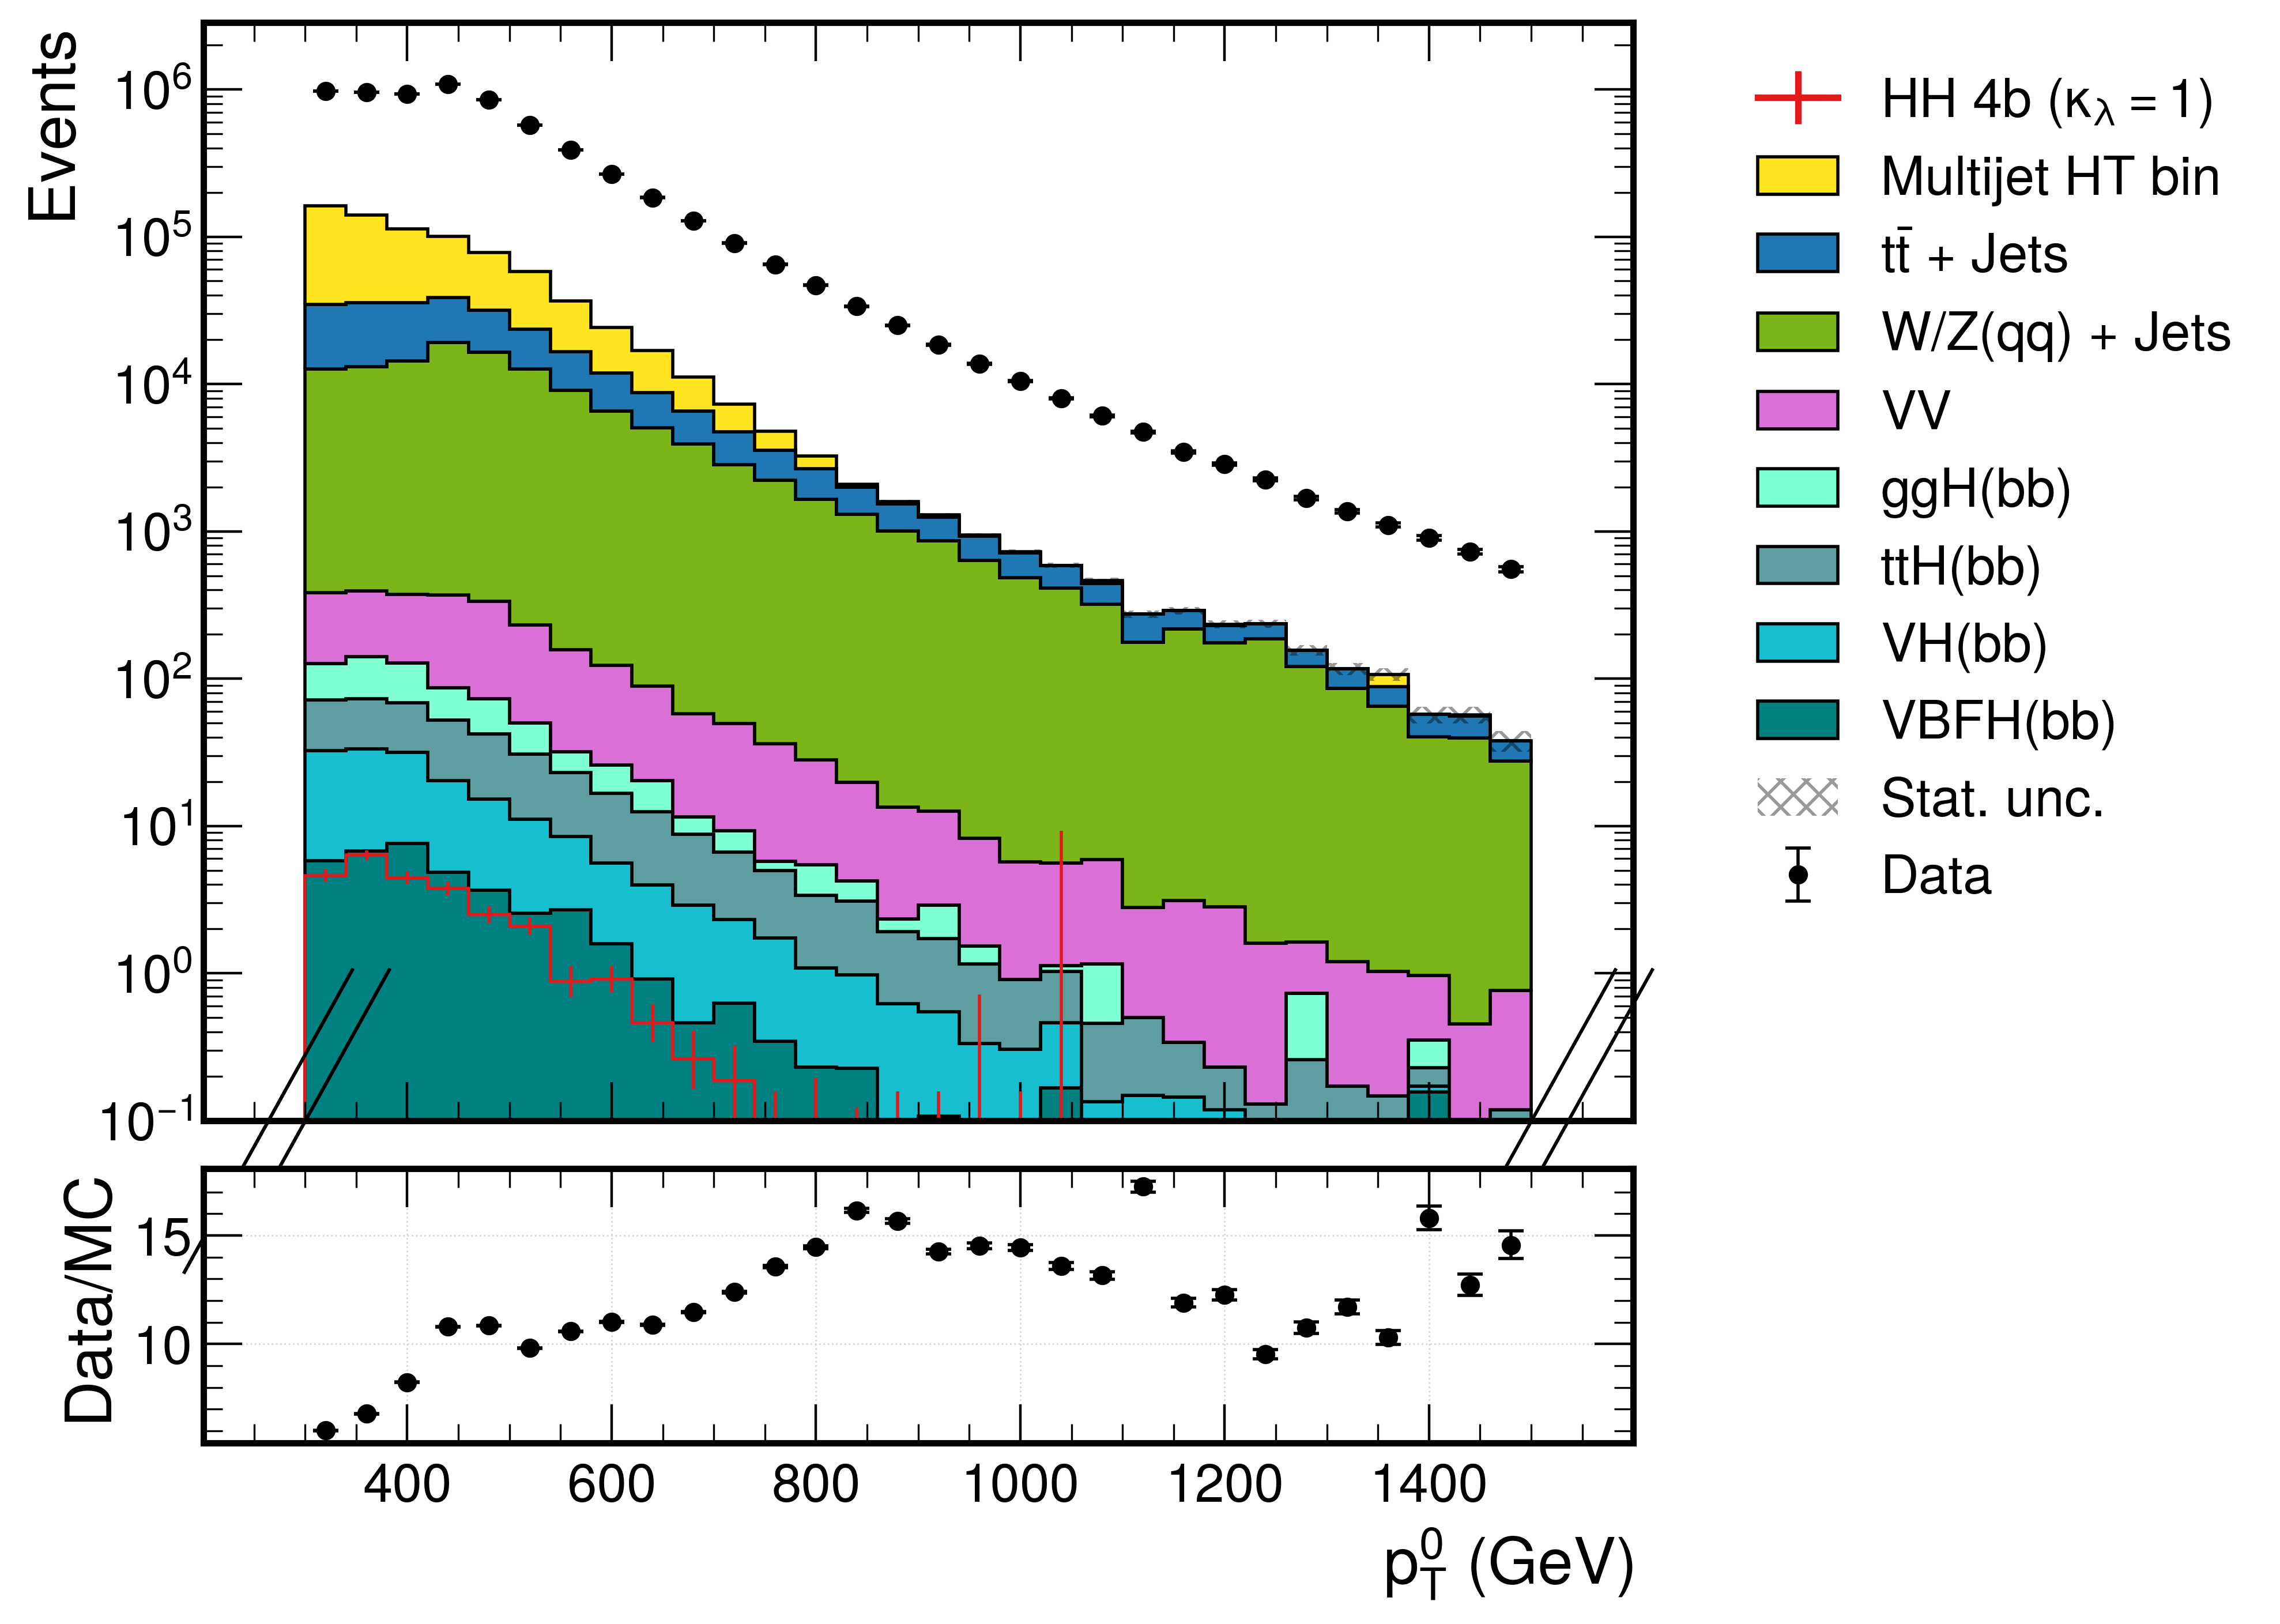

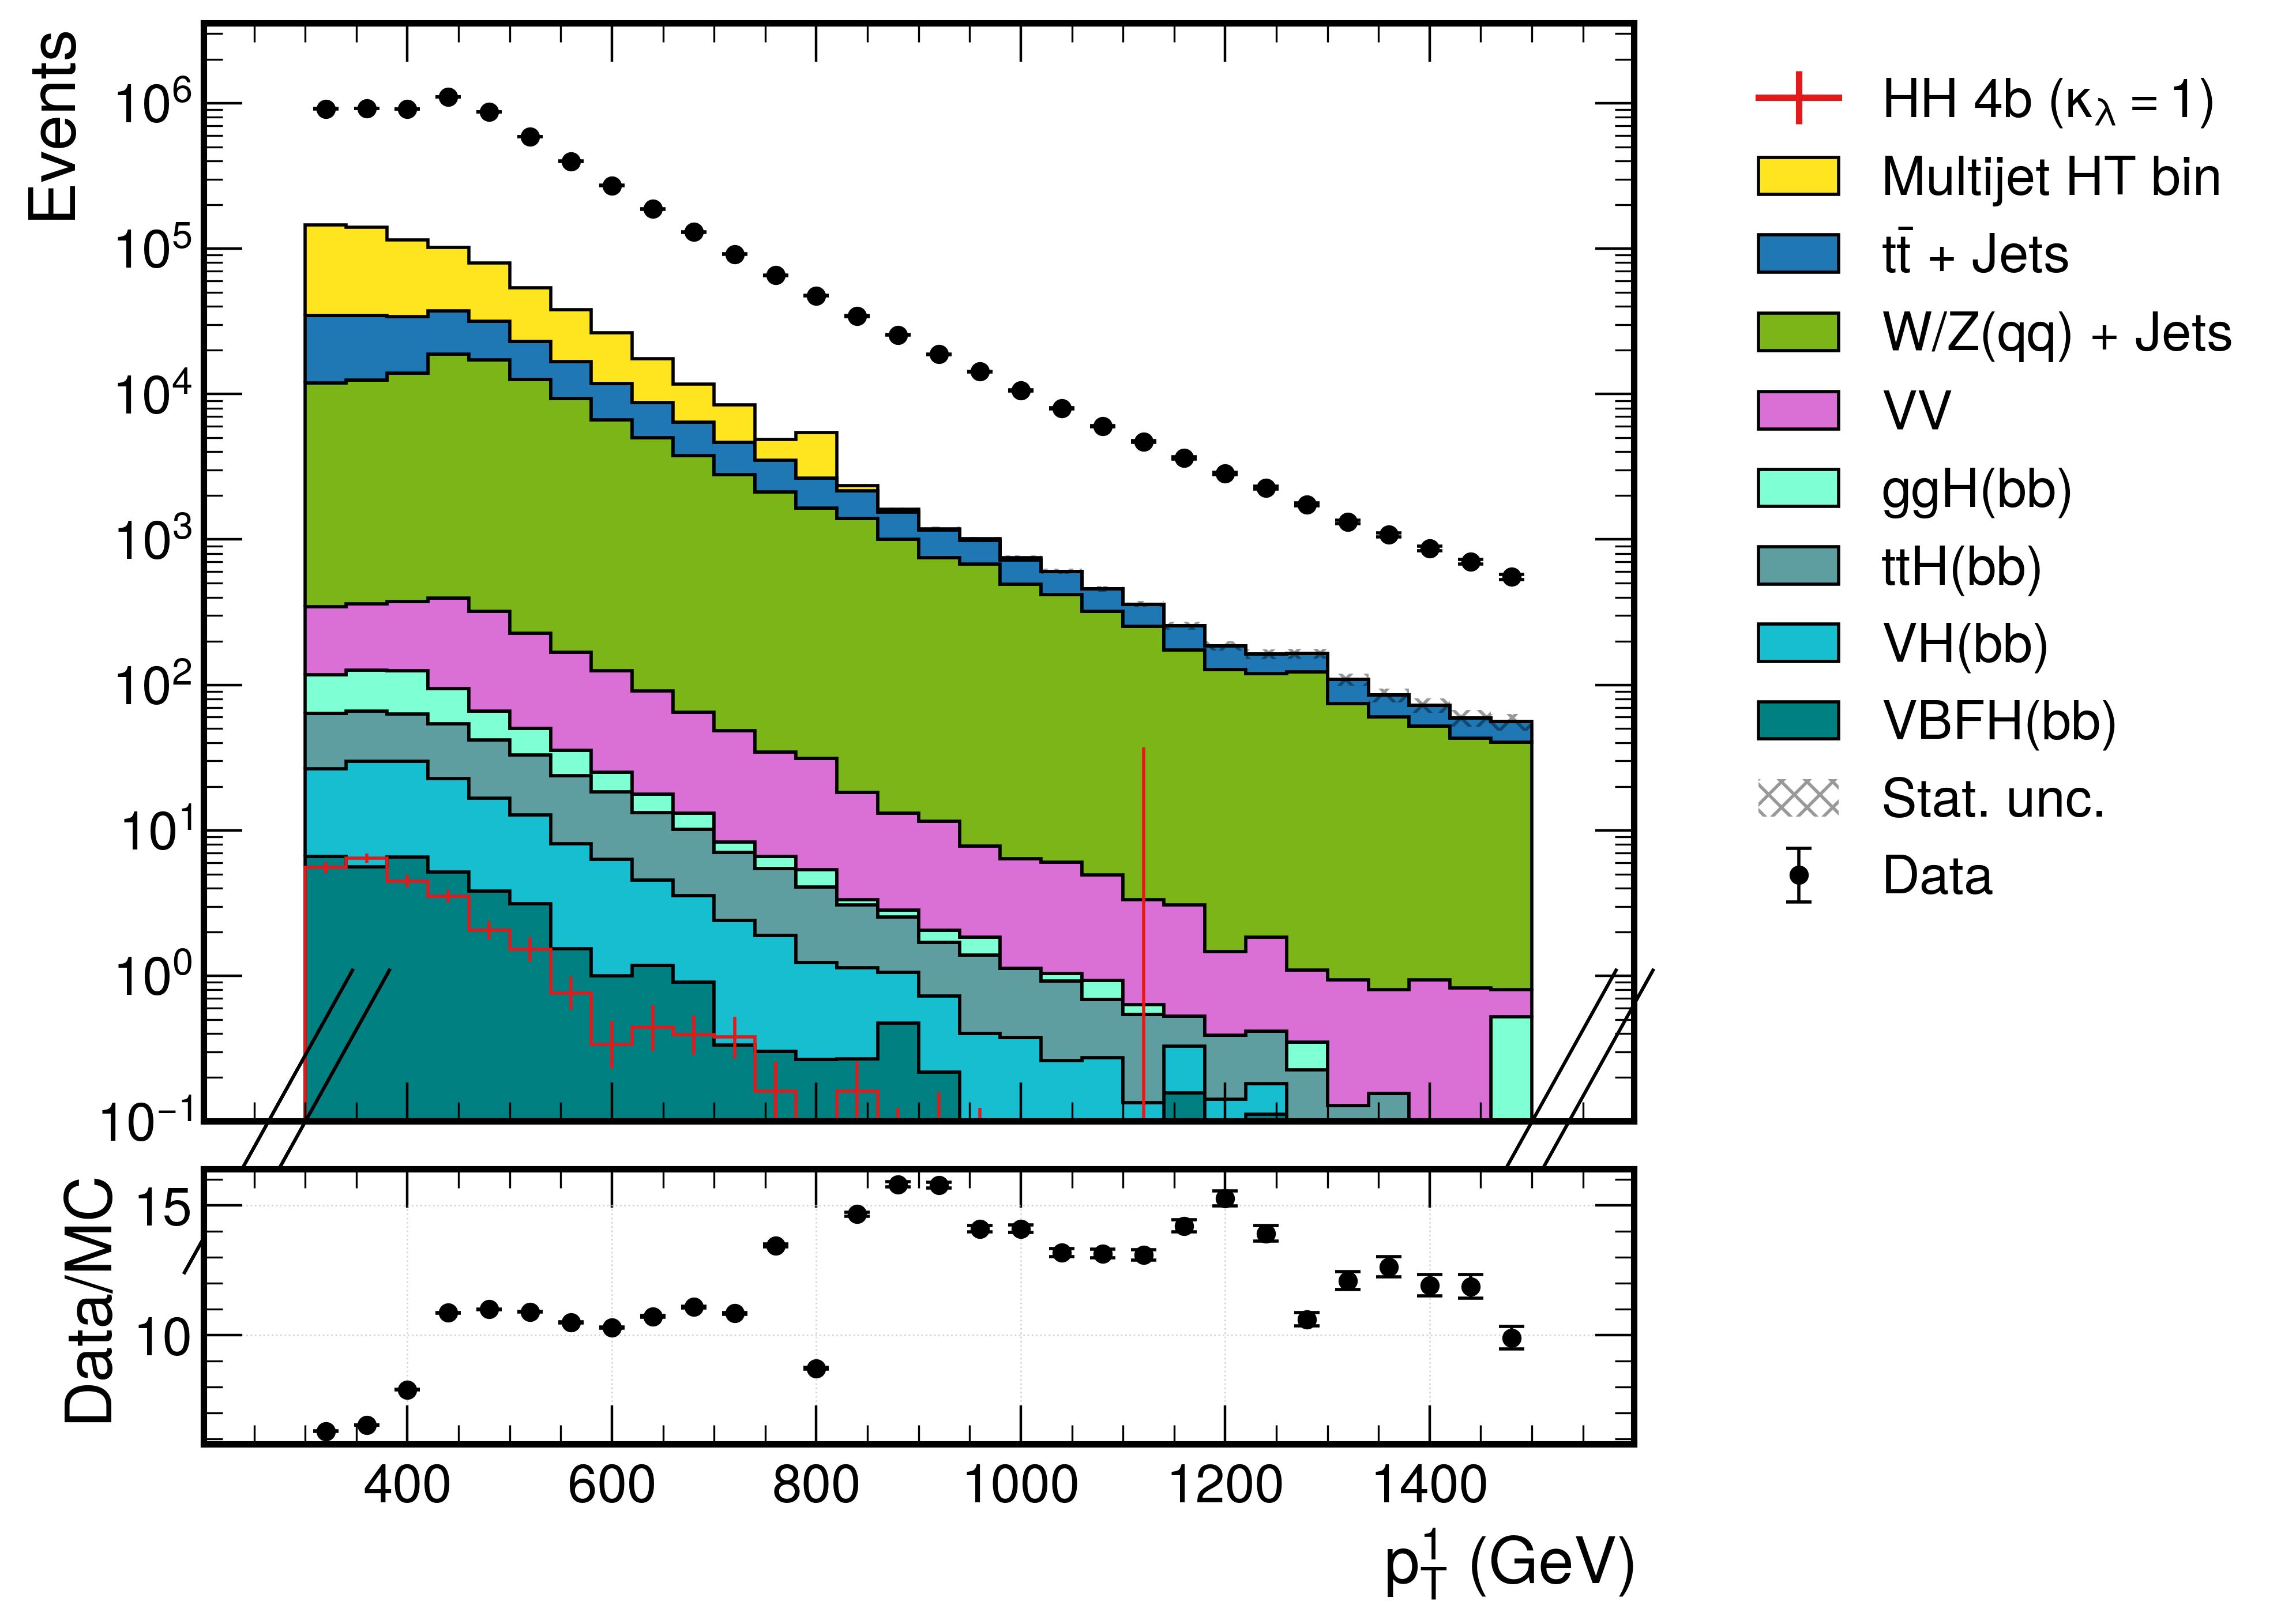

In [13]:
# make a stacked plot
plotting.plot_hists(
    year,
    hists,
    [
        "ak8FatJetPt0",
        "ak8FatJetPt1",
    ],
)